In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
import zipline

np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

In [6]:
import glob
import pybrain
import numpy as np
from pybrain.structure import FeedForwardNetwork
from pybrain.structure import LinearLayer, SigmoidLayer
from pybrain.structure import FullConnection
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import random
import ast
import time
import sqlalchemy
from sqlalchemy import *
from sqlalchemy import event
import sqlite3
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import *
import urllib2
import urllib
import json
import glob
import pprint
import dateutil.parser
import pprint
import re
from sklearn import linear_model, datasets
import time
from sklearn.naive_bayes import GaussianNB
import nltk
from collections import defaultdict
from sklearn import svm
pp = pprint.PrettyPrinter(indent=4)
import gevent.monkey
gevent.monkey.patch_socket()
import numpy
import time
import sqlalchemy
from sqlalchemy import *
from sqlalchemy import event
from sqlalchemy.dialects.mysql import LONGTEXT
import sqlite3
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import *
import urllib2
import urllib
import json
import pprint
import dateutil.parser
import gevent
import datetime
import marshal
from pylearn2.datasets.dense_design_matrix import DenseDesignMatrix

from __future__ import division
import os

import pylearn2
import numpy as np
from pylearn2.train import Train
from pylearn2.datasets.mnist import MNIST
from pylearn2.models import softmax_regression, mlp, svm
from pylearn2.training_algorithms import bgd, sgd
from pylearn2.termination_criteria import MonitorBased, EpochCounter
from pylearn2.train_extensions import best_params, live_monitoring
from pylearn2.utils import serial
from pylearn2.costs.mlp.dropout import Dropout
from pylearn2.costs.mlp import WeightDecay
from theano import function
from theano import tensor as T
import cPickle as pickle
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

Using gpu device 0: GRID K520


In [3]:
## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

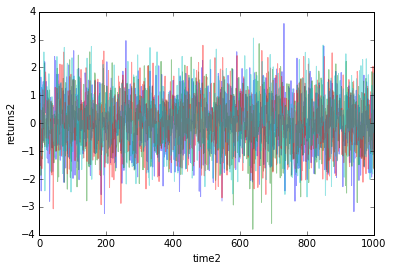

In [7]:
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time2')
plt.ylabel('returns2')

In [9]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[ 0.38869152  0.2140036   0.24396542  0.15333946]
[ 0.36700504  0.13297421  0.17647188  0.32354887]


In [10]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [11]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in xrange(n_portfolios)
])

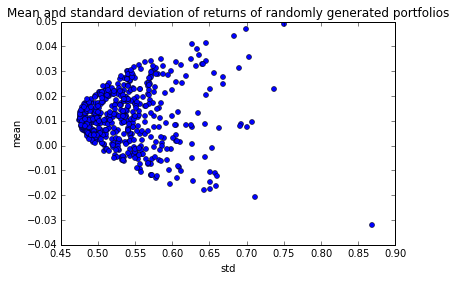

In [12]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

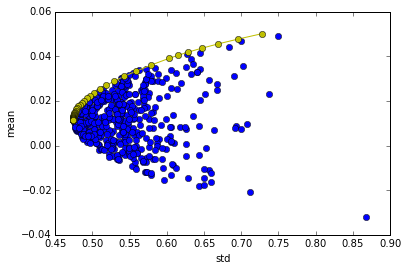

In [13]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

In [15]:
print(weights)

[[  2.77880107e-09]
 [  3.20322848e-06]
 [  1.54301198e-06]
 [  9.99995251e-01]]


In [20]:
data = zipline.get_pricing(['IBM', 'GLD', 'XOM', 'AAPL', 
                    'MSFT', 'TLT', 'SHY'],
                     start_date='2005-06-07', end_date='2014-01-27')

AttributeError: 'module' object has no attribute 'get_pricing'

In [21]:
dir(zipline)

['TradingAlgorithm',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '__version__',
 'algorithm',
 'api',
 'data',
 'errors',
 'finance',
 'gens',
 'history',
 'ip',
 'protocol',
 'sources',
 'transforms',
 'utils']

In [22]:
dir(zipline.data)

['__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'benchmarks',
 'load_bars_from_yahoo',
 'load_from_yahoo',
 'loader',
 'loader_utils']